In [1]:
import io
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('Data/p7_master_window.csv')
df.fillna(value=0, inplace=True)
df = df[['op_num_people', 'of_pose_distance', 'of_gaze_distance', 'of_success', 'of_confidence', 'ros_difficulty', 'ros_mistakes_session', 'ros_ts_robot_talked', 'engagement']]

len_df = len(df)
split_ratio = 0.8
split = int(split_ratio * len_df)

train_df, test_df = df.iloc[:split,:], df.iloc[split:,:]

feats = []
for i in df.columns:
    if i!= 'engagement':
        feats.append(i)
label = ['engagement']

X = df[feats]
Y = df[label]
X_train = train_df[feats]
y_train = train_df[label]
X_test = test_df[feats]
y_test = test_df[label]

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16100, 8) (16100, 1)
(4026, 8) (4026, 1)


In [4]:
feature_count = len(feats)
label_count = 1
training_epochs = 300
learning_rate = 0.01
hidden_layers = feature_count - 1
cost_history = np.empty(shape=[1],dtype=float)
X = tf.placeholder(tf.float32,[None,feature_count])
Y = tf.placeholder(tf.float32,[None,label_count])
is_training=tf.Variable(True,dtype=tf.bool)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# models
initializer = tf.contrib.layers.xavier_initializer()
h0 = tf.layers.dense(X, hidden_layers, activation=tf.nn.relu, kernel_initializer=initializer)
h1 = tf.nn.dropout(h0, 0.9)
h2 = tf.layers.dense(h1, hidden_layers, activation=tf.nn.relu, kernel_initializer=initializer)
h3 = tf.layers.dense(h2, hidden_layers, activation=tf.nn.relu, kernel_initializer=initializer)
h4 = tf.layers.dense(h3, hidden_layers, activation=tf.nn.relu, kernel_initializer=initializer)
h5 = tf.layers.dense(h4, label_count, activation=None)

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=h5)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.nn.sigmoid(h5)
correct_pred = tf.equal(tf.round(predicted), Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 10 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    print('Test Accuracy:', sess.run([accuracy, tf.round(predicted)], feed_dict={X: X_test, Y: y_test}))

Step:     0	Loss: 4.387	Acc: 46.23%
Step:    10	Loss: 1.059	Acc: 40.43%
Step:    20	Loss: 0.591	Acc: 73.83%
Step:    30	Loss: 0.539	Acc: 76.20%
Step:    40	Loss: 0.508	Acc: 76.30%
Step:    50	Loss: 0.497	Acc: 76.80%
Step:    60	Loss: 0.484	Acc: 77.16%
Step:    70	Loss: 0.470	Acc: 77.87%
Step:    80	Loss: 0.464	Acc: 77.88%
Step:    90	Loss: 0.459	Acc: 77.84%
Step:   100	Loss: 0.444	Acc: 77.96%
Step:   110	Loss: 0.437	Acc: 78.04%
Step:   120	Loss: 0.431	Acc: 78.36%
Step:   130	Loss: 0.423	Acc: 81.33%
Step:   140	Loss: 0.416	Acc: 81.45%
Step:   150	Loss: 0.413	Acc: 82.03%
Step:   160	Loss: 0.402	Acc: 82.31%
Step:   170	Loss: 0.399	Acc: 82.69%
Step:   180	Loss: 0.395	Acc: 82.96%
Step:   190	Loss: 0.392	Acc: 82.93%
Step:   200	Loss: 0.391	Acc: 83.16%
Step:   210	Loss: 0.390	Acc: 83.33%
Step:   220	Loss: 0.388	Acc: 83.25%
Step:   230	Loss: 0.385	Acc: 83.33%
Step:   240	Loss: 0.387	Acc: 83.11%
Step:   250	Loss: 0.385	Acc: 83.38%
Step:   260	Loss: 0.383	Acc: 83.58%
Step:   270	Loss: 0.384	Acc:

(302,)


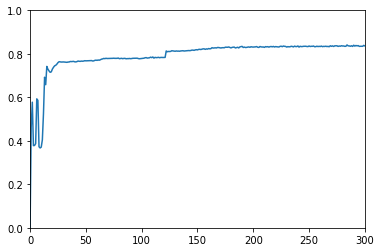

In [7]:
print(cost_history.shape)
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,1])
plt.show()